In [11]:
# Importing basic Libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import regex as re
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')


<Axes: >

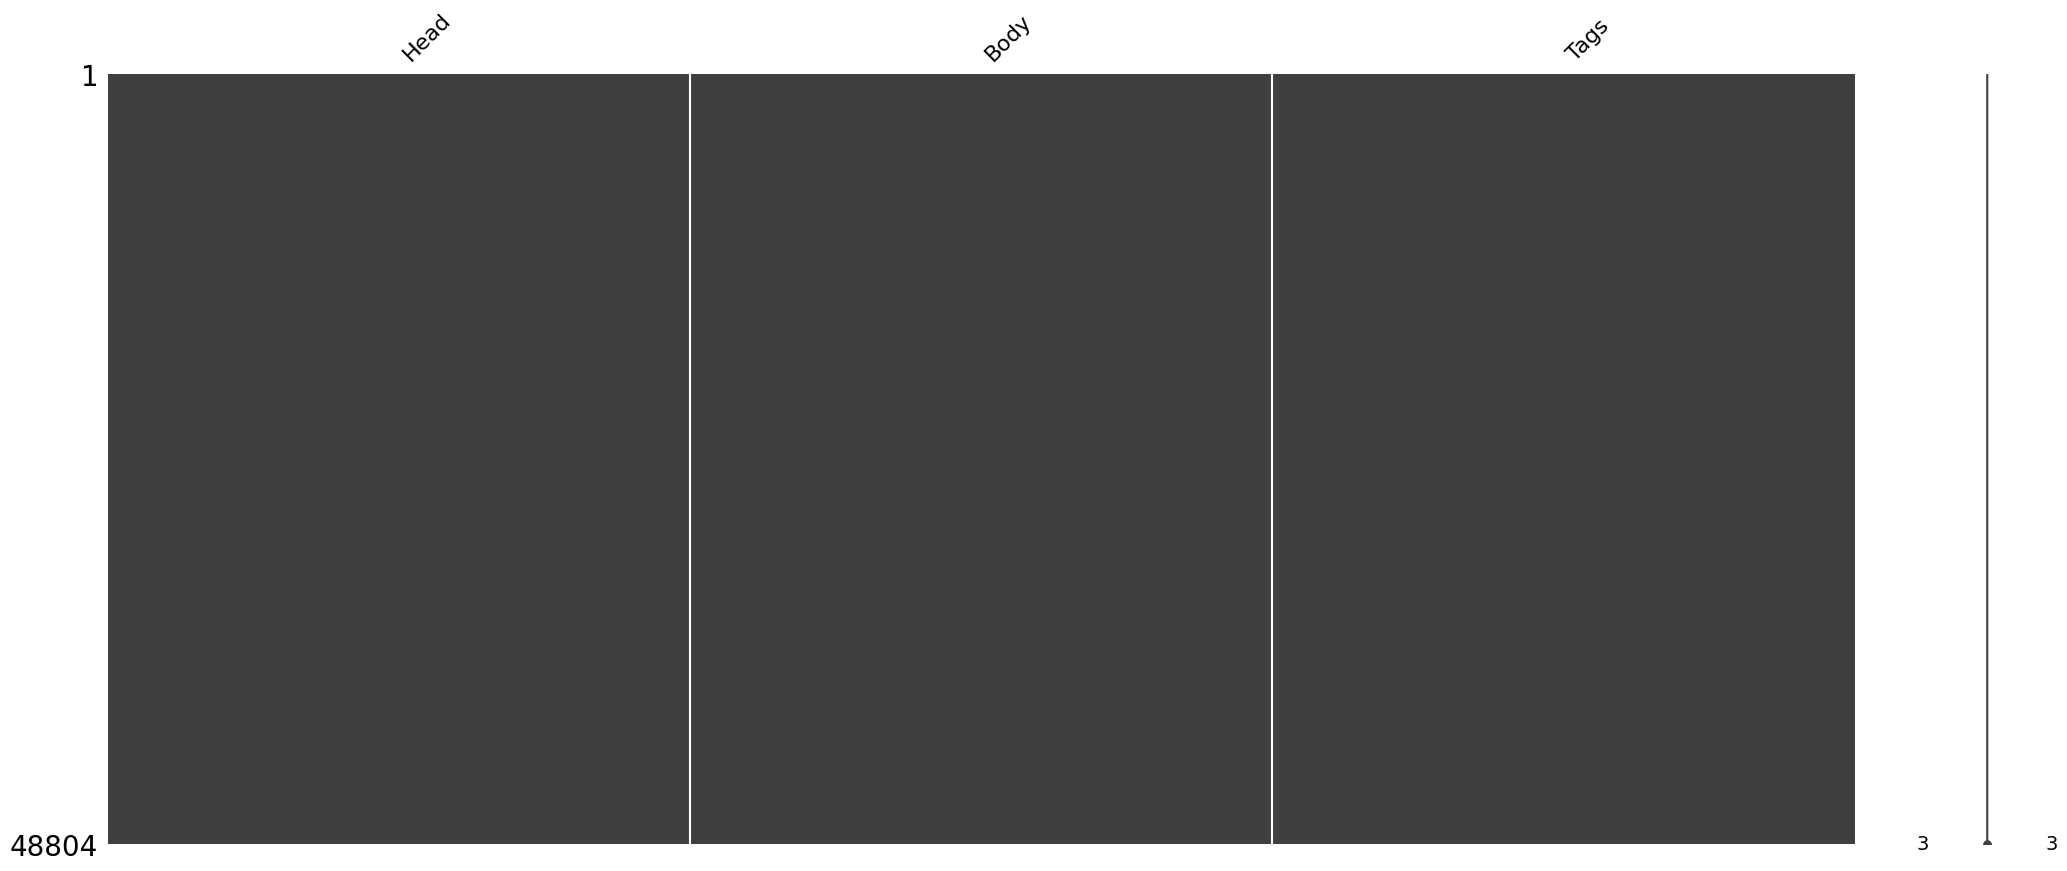

In [14]:

pd.set_option('display.max_columns', 10)
df = pd.read_csv('Data/combined_df.csv')
df.isna().sum()

# Dropping the rows with missing values in the body and tags columns and dropping the duplicates.
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
msno.matrix(df)



In [18]:
# Creating a function to clean the text which will only have the words and no special characters or numbers.
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text

df['Head'] = df['Head'].apply(clean_text)
df['Body'] = df['Body'].apply(clean_text)
df['Text'] = df['Head'] + ' ' + df['Body']

# Cleaning the tags
df['Tags Count'] = df['Tags'].apply(lambda x: len(literal_eval(x)))
df['Tags Count'].value_counts()

# Removing the rows with more than 5 tags
df = df[df['Tags Count'] <= 5]
df['Tags Count'].value_counts()


Tags Count
3    13642
2    11133
4    10459
5     8636
1     4933
Name: count, dtype: int64

In [19]:
df.to_csv('Data/cleaned_data.csv', index=False)

## Now our data is in a good shape, we can start to do some analysis on it.